# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv('/datasets/megaline_users.csv')

calls = pd.read_csv('/datasets/megaline_calls.csv')

messages = pd.read_csv('/datasets/megaline_messages.csv')

internet = pd.read_csv('/datasets/megaline_internet.csv')

plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

#Información de DataFrame plans:

display(plans.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [4]:
# Imprime una muestra de los datos para las tarifas

display(plans.sample(2))

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Esta tabla es dimensional. Contiene información sobre los planes y paquetes ofrecidos por la compañía en sólo dos filas de información. De momento la tabla no requiere ninguna modificación.



## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
#la tabla plans no requiere de momento ser corregida ni modificada.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
#la tabla plans no requiere de momento ser corregida ni modificada.

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

#Información de DataFrame users:


display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [8]:
# Imprime una muestra de datos para usuarios

display(users.sample(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
317,1317,Ruthanne,Heath,70,"Phoenix-Mesa-Chandler, AZ MSA",2018-11-11,ultimate,NaN
32,1032,Delila,Dalton,59,"Birmingham-Hoover, AL MSA",2018-06-07,ultimate,NaN
324,1324,Romana,Moore,18,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,surf,NaN
202,1202,Osvaldo,Mayer,36,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-09-30,ultimate,NaN
259,1259,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
477,1477,Magaly,Rivas,52,"Riverside-San Bernardino-Ontario, CA MSA",2018-08-24,ultimate,NaN
52,1052,Edmond,Hopkins,47,"Houston-The Woodlands-Sugar Land, TX MSA",2018-03-05,surf,NaN
297,1297,Nicky,Tucker,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-25,surf,NaN
280,1280,Jasper,Berry,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

   
Al realizar una revisión de los datos, podemos observar lo siguiente:
    
1. La columna 'reg_date' (que hace referencia a la fecha de suscripción en formato (dd, mm, aa) es un tipo object. Si     queremos realizar cualquier análisis, será necesario convertirla a DateTime.
    
2. La columna 'churn_date contiene sólo 34 registros de tipo fecha. De momento lo que haremos será asignarle el registro 'active' a los valores nulos de esta columna. En caso que sea necesario hacer un análisis sobre los 34 registros de fechas, se filtrarán y luego se procede con el cambio a tipo datetime64[ns]

3. Se revisarán los posibles datos duplicados


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
#Se procede a realizar el cambio del tipo de dato en la columna 'reg_date' a datetime:

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT')

display(users['reg_date'])

0     2018-12-24
1     2018-08-13
2     2018-10-21
3     2018-01-28
4     2018-05-23
         ...    
495   2018-09-04
496   2018-02-20
497   2018-12-10
498   2018-02-04
499   2018-05-06
Name: reg_date, Length: 500, dtype: datetime64[ns]

In [10]:
#Ahora revisaremos si existen datos duplicados que afecten el análisis de esta tabla:

duplicated_users = users[users.duplicated()]

display(duplicated_users.sum())

#Revisamos que ningún id de usuario esté duplicado:

duplicated_user_id = users[users['user_id'].duplicated()]
display(duplicated_user_id.sum())


#Cabe destacar que en esta tabla, el resto de columnas pueden contener valores duplicados (nombres, edades, ciudades, planes y 
#fechas pueden contener valores duplicados)

user_id       0.0
first_name    0.0
last_name     0.0
age           0.0
city          0.0
plan          0.0
churn_date    0.0
dtype: float64

user_id       0.0
first_name    0.0
last_name     0.0
age           0.0
city          0.0
plan          0.0
churn_date    0.0
dtype: float64

### Enriquecer los datos

In [11]:
#Revisemos si existen datos nulos en el dataset users:
display(users.isnull().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [12]:
#Revisión de información de usuarios que contienen registros no-nulos en la columna 'churn_date':
display(users[~users['churn_date'].isnull()])

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
#En el caso de la columna 'churn_date' sólo cambiaremos de momento los valores nulos por la palabra 'active', 
#así entenderemos que el usuario está activo. En caso de requerirlo, filtraremos los datos con fechas y haremos el cambio a
#datetime

users['churn_date'] = users['churn_date'].fillna('active')

display(users.head(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,active
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,active
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,active
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,active
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,active


Listo, nuestro dataframe 'users' está listo para su posterior análisis.
    
    
Ahora procederemos con el dataframe 'calls':



## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

#Información de DataFrame calls:

display(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

In [15]:
# Imprime una muestra de datos para las llamadas

display(calls.sample(10))

,id,user_id,call_date,duration
65655,1237_262,1237,2018-12-02,3.82
77882,1279_10,1279,2018-10-27,5.00
68319,1246_338,1246,2018-05-19,1.71
115934,1406_160,1406,2018-11-27,11.03
74989,1264_323,1264,2018-11-29,1.55
114466,1401_172,1401,2018-10-08,8.61
90127,1327_52,1327,2018-10-21,5.27
137558,1499_27,1499,2018-10-21,6.46
94471,1336_337,1336,2018-04-25,0.00
46505,1168_569,1168,2018-12-23,12.94


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

  
Al realizar una revisión de los datos, podemos observar lo siguiente:
    
1. Los registros están completos en todas las columnas de la tabla.
2. El formato de la columna 'call_date' será modificado a datetime.
3. Se revisarán los posibles datos duplicados.    



### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
#Revisión de datos duplicados en la tabla calls:

duplicated_calls = calls[calls.duplicated()]

display(duplicated_calls.sum())


#Revisamos que ningún id de llamada esté duplicado:
duplicated_id_calls = calls['id'].duplicated()
display(duplicated_id_calls.sum())

#Cabe destacar que en esta tabla, las columnas user_id y call_date pueden contener valores duplicados: Un usuario puede realizar
#más de una llamada al día. Lo mismo la columna duration, una llamada pudo haber tenido la misma duración que otra.

id           0.0
user_id      0.0
call_date    0.0
duration     0.0
dtype: float64

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
#Modificación de columna 'call_date' a tipo datetime:

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT')

display(calls['call_date'])

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

Listo nuestro dataframe calls.
    
Procedemos a revisar el dataframe messages


## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

#Información de DataFrame messages:

display(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

In [19]:
# Imprime una muestra de datos para los mensajes

display(messages.sample(10))

,id,user_id,message_date
29787,1183_182,1183,2018-11-22
72026,1467_358,1467,2018-09-03
74636,1482_49,1482,2018-11-08
957,1008_4,1008,2018-11-22
48089,1324_820,1324,2018-04-16
30729,1193_455,1193,2018-07-11
4797,1044_177,1044,2018-09-15
43103,1283_42,1283,2018-12-04
22452,1133_621,1133,2018-09-11
31773,1196_259,1196,2018-02-25


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

<div class="alert alert-block alert-info">
<b>Comentarios del estudiante.</b> <a class="tocSkip"></a>
    
Mismo caso que el dataframe calls:
    
1. Los registros están completos en todas las columnas de la tabla.
2. El formato de la columna 'message_date' será modificado a datetime.
3. Se revisarán los posibles datos duplicados.

</div>

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
#Revisión de datos duplicados:

duplicated_messages = messages[messages.duplicated()]

display(duplicated_messages.sum())

#Revisión de posibles id_mensajes duplicados:

duplicated_id_messages = messages[messages['id'].duplicated()]
display(duplicated_id_messages.sum())

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

id              0.0
user_id         0.0
message_date    0.0
dtype: float64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
#Modificación de columna 'message_date' a tipo datetime:

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT')

display(messages['message_date'])

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

**Comentarios:**

Listo nuestro dataframe messages.
    
Procedemos a revisar el dataframe internet.

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet

#Información de DataFrame internet:

display(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

In [23]:
# Imprime una muestra de datos para el tráfico de internet

display(internet.sample(10))

,id,user_id,session_date,mb_used
82859,1387_75,1387,2018-10-11,46.30
91270,1420_163,1420,2018-08-07,201.21
67434,1313_108,1313,2018-07-31,218.43
87345,1405_48,1405,2018-08-21,75.83
9546,1049_196,1049,2018-10-18,447.38
1385,1008_96,1008,2018-11-03,309.07
29859,1138_85,1138,2018-04-09,0.00
75330,1354_256,1354,2018-11-07,545.92
26864,1123_359,1123,2018-07-24,0.00
91144,1420_37,1420,2018-11-21,185.01


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Comentarios revisión previa de DataFrame internet:**
    
1. Los registros están completos en todas las columnas de la tabla.
2. El formato de la columna 'session_date' será modificado a datetime.
3. Se revisarán los posibles datos duplicados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [24]:
#Revisión de datos duplicados

duplicated_internet = internet[internet.duplicated()]
display(duplicated_internet.sum())

#Revisión de posibles id de sesiones de internet duplicados:

duplicated_id_internet_sessions = internet[internet['id'].duplicated()]
display(duplicated_id_internet_sessions.sum())

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
dtype: float64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [25]:
#Modificación de columna 'session_date' a tipo datetime:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT')

display(internet['session_date'])

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

display(plans)
print()
display(plans.info())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

### Descripción de las tarifas
Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación puedes ver una descripción de las tarifas:

### Surf

- Pago mensual: 20$.

- 500 minutos al mes, 50 SMS y 15 GB de datos.
- Si se exceden los límites del paquete:
- 1 minuto: 3 centavos.
- 1 SMS: 3 centavos.
- 1 GB de datos: 10$.

### Ultimate


- Pago mensual: 70$.

- 3000 minutos al mes, 1000 SMS y 30 GB de datos.
- Si se exceden los límites del paquete:
- 1 minuto: 1 centavo.
- 1 SMS: 1 centavo.
- 1 GB de datos: 7$.

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

#Primero agregamos una columna que almacene el número del mes de la columna 'call_date' utilizando el método dt.month.
#La llamaremos 'dt_month':

calls['dt_month'] = calls['call_date'].dt.month


#Ahora procederemos con agrupar por usuarios y por los números de meses las id de llamadas (columna 'id'):
calls_per_month = calls.groupby(['user_id','dt_month'])['id'].count().reset_index()


#Finalmente, reemplazamos los nombres de las columnas por algo más descriptivo:
calls_per_month = calls_per_month.rename(columns = {'id':'calls_per_month'})

display(calls_per_month)

                                         

,user_id,dt_month,calls_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

#Utilizaremos la variable minutes_spent para almacenar el cálculo de la suma de minutos usados por usuario:
minutes_spent = calls.groupby(['user_id','dt_month'])['duration'].sum().reset_index()

#Y ahora reemplazamos los nombres de la columna 'duration' por algo más descriptivo:
minutes_spent = minutes_spent.rename(columns={'duration':'minutes_spent'})

display(minutes_spent)

,user_id,dt_month,minutes_spent
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.


#Al igual que en el dataframe calls, creamos una nueva columna que almacene el número de cada mes:
messages['dt_month'] = messages['message_date'].dt.month


#Luego agrupamos por 'user_id' y 'dt_month' el conteo de mensajes enviados:
messages_sent = messages.groupby(['user_id','dt_month'])['id'].count().reset_index()


#Y ahora reemplazamos los nombres de la columna 'id' por algo más descriptivo:
messages_sent = messages_sent.rename(columns = {'id':'messages_sent'})

display(messages_sent)

,user_id,dt_month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

#Al igual que en los casos anteriores, creamos una nueva columna que almacene el número de cada mes:
internet['dt_month'] = internet['session_date'].dt.month


#Luego agrupamos por 'user_id' y 'dt_month' la suma de megabytes usados:
data_traffic_mb = internet.groupby(['user_id','dt_month'])['mb_used'].sum().reset_index()

display(data_traffic_mb)

,user_id,dt_month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month


#Iniciaremos fusionando el dataframe calls_per_month y minutes_spent:

df_user_calls_mins = calls_per_month.merge(minutes_spent, how='outer', on = ['user_id','dt_month'])
display(df_user_calls_mins)

,user_id,dt_month,calls_per_month,minutes_spent
0,1000,12,16,116.83
1,1001,8,27,171.14
2,1001,9,49,297.69
3,1001,10,65,374.11
4,1001,11,64,404.59
...,...,...,...,...
2253,1498,12,39,324.77
2254,1499,9,41,330.37
2255,1499,10,53,363.28
2256,1499,11,45,288.56


In [32]:
#Ahora procederemos con messages_sent y data_traffic_mb:

df_user_msg_internet = messages_sent.merge(data_traffic_mb, how= 'outer', on= ['user_id','dt_month'])
display(df_user_msg_internet)

,user_id,dt_month,messages_sent,mb_used
0,1000,12,11.0,1901.47
1,1001,8,30.0,6919.15
2,1001,9,44.0,13314.82
3,1001,10,53.0,22330.49
4,1001,11,36.0,18504.30
...,...,...,...,...
2287,1498,12,NaN,23137.69
2288,1499,9,NaN,12984.76
2289,1499,10,NaN,19492.43
2290,1499,11,NaN,16813.83


In [33]:
#Ahora fusionaremos df_user_calls_mins y df_user_msg_internet en un nuevo dataframe llamado df_users_month:

df_users_month = df_user_calls_mins.merge(df_user_msg_internet, how='outer', on=['user_id','dt_month'])
display(df_users_month)



,user_id,dt_month,calls_per_month,minutes_spent,messages_sent,mb_used
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91
2289,1361,5,NaN,NaN,2.0,1519.69
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,233.17


In [34]:
#Finalmente, reemplazaremos los valores nulos por 0, es decir que el usuario no hizo uso de dicho servicio en el mes descrito:

df_users_month = df_users_month.fillna(0)

display(df_users_month)

,user_id,dt_month,calls_per_month,minutes_spent,messages_sent,mb_used
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,0.0,0.00,61.0,13039.91
2289,1361,5,0.0,0.00,2.0,1519.69
2290,1482,10,0.0,0.00,2.0,0.00
2291,1108,12,0.0,0.00,0.0,233.17


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [35]:
# Añade la información de la tarifa

#Para esto, debemos realizar una fusión del dataframe df_users_month con la tabla users a través de 'user_id':

df_users_info = users.merge(df_users_month, how='inner', on='user_id')

display(df_users_info)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,dt_month,calls_per_month,minutes_spent,messages_sent,mb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active,12,16.0,116.83,11.0,1901.47
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active,8,27.0,171.14,30.0,6919.15
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active,9,49.0,297.69,44.0,13314.82
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active,10,65.0,374.11,53.0,22330.49
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active,11,64.0,404.59,36.0,18504.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,active,12,39.0,324.77,0.0,23137.69
2289,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active,9,41.0,330.37,0.0,12984.76
2290,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active,10,53.0,363.28,0.0,19492.43
2291,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active,11,45.0,288.56,0.0,16813.83


In [36]:
#Finalmente agregamos la información de la tarifa a través de la columna 'plan' un último merge con la tabla plans:

df_users = df_users_info.merge(plans, left_on='plan', right_on='plan_name')

display(df_users)
display(df_users.info())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,dt_month,calls_per_month,...,messages_sent,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active,12,16.0,...,11.0,1901.47,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11,2.0,...,15.0,2068.37,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12,9.0,...,139.0,32118.82,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,active,10,71.0,...,21.0,17106.99,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,active,11,63.0,...,37.0,23676.72,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,active,12,39.0,...,0.0,23137.69,50,15360,500,20,10,0.03,0.03,surf
2289,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active,9,41.0,...,0.0,12984.76,50,15360,500,20,10,0.03,0.03,surf
2290,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active,10,53.0,...,0.0,19492.43,50,15360,500,20,10,0.03,0.03,surf
2291,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active,11,45.0,...,0.0,16813.83,50,15360,500,20,10,0.03,0.03,surf


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   first_name             2293 non-null   object        
 2   last_name              2293 non-null   object        
 3   age                    2293 non-null   int64         
 4   city                   2293 non-null   object        
 5   reg_date               2293 non-null   datetime64[ns]
 6   plan                   2293 non-null   object        
 7   churn_date             2293 non-null   object        
 8   dt_month               2293 non-null   int64         
 9   calls_per_month        2293 non-null   float64       
 10  minutes_spent          2293 non-null   float64       
 11  messages_sent          2293 non-null   float64       
 12  mb_used                2293 non-null   float64       
 13  mes

None

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [37]:
# Calcula el ingreso mensual para cada usuario:

# Antes que nada, debemos redondear los minutos consumidos con el método np.ceil():

df_users['minutes_spent'] = np.ceil(df_users['minutes_spent'])

#Inicialmente calculamos las diferencias del total de minutos consumidos - la cantidad de minutos del plan
#Es decir df_users['minutes_spent'] - df_users['minutes_included']:

df_users['minutes_diff'] = np.maximum(df_users['minutes_spent'] - df_users['minutes_included'],0)


#En este caso utilizamos el método de numpy np.maximum y definimos que el menor valor sea 0 en caso de que 
#una resta dé negativa o igual a 0

display(df_users['minutes_diff'].min())
print()
display(df_users['minutes_diff'].max())
print()
display(df_users['minutes_diff'].sample(20))

0.0

932.0

1073      0.0
409       0.0
1577      0.0
164       0.0
1084      0.0
892       0.0
1117      0.0
1225    199.0
1981    546.0
86        0.0
531       0.0
1075      0.0
451       0.0
1242      0.0
1530     14.0
1553      0.0
1054      0.0
2253      0.0
38        0.0
1139      0.0
Name: minutes_diff, dtype: float64

In [38]:
#Finalmente ejecutamos la fórmula: valor total = ((diferencia minutos)*costo_tarifa_adicional):

df_users['usd_minutes_add_cost_per_user'] = (df_users['minutes_diff']*df_users['usd_per_minute'])
display(df_users['usd_minutes_add_cost_per_user'].sample(20))

1022    3.21
1665    0.00
1136    0.00
227     0.00
2008    0.00
57      0.00
112     0.00
1990    0.00
1388    0.00
381     0.00
805     0.00
417     0.00
1222    3.36
1027    0.00
1099    0.00
1788    8.64
1623    0.00
1659    0.00
658     0.00
1888    0.00
Name: usd_minutes_add_cost_per_user, dtype: float64

In [39]:
#Ahora procederemos con los mensajes:

df_users['messages_diff'] = np.maximum(df_users['messages_sent'] - df_users['messages_included'], 0)

#Al igual que el caso anterior, se usa el método maximum de numpy para aplicar valores de 0 a las diferencias negativas o
#iguales a 0:

display(df_users['messages_diff'].min())
print()
display(df_users['messages_diff'].max())
print()
display(df_users['messages_diff'].sample(20))

0.0

216.0

1807     0.0
70       0.0
835      0.0
1841    28.0
356      0.0
795      0.0
529      0.0
300      0.0
162      0.0
387      0.0
98       0.0
1836     0.0
1988     0.0
837      0.0
841      0.0
765      0.0
648      0.0
1950     0.0
1348     0.0
1158     0.0
Name: messages_diff, dtype: float64

In [40]:
#Finalmente ejecutamos la fórmula: valor total = ((diferencia minutos)*costo_tarifa_adicional):

df_users['usd_messages_add_cost_per_user'] = (df_users['messages_diff']*df_users['usd_per_message'])
display(df_users['usd_messages_add_cost_per_user'].sample(20))

1606    0.00
361     0.00
2017    0.00
1145    1.62
669     0.00
210     0.00
1095    0.00
428     0.00
1740    0.00
1685    0.00
1622    0.45
2054    0.00
613     0.00
1360    0.03
587     0.00
1555    0.00
1699    0.00
2267    0.00
965     0.33
2031    0.00
Name: usd_messages_add_cost_per_user, dtype: float64

In [41]:
#Ahora procederemos con los datos consumidos de internet:


#Inicialmente calculamos las diferencias del total de datos consumidos - la cantidad de datos del plan
#Es decir df_users['mb_used'] - df_users['mb_per_month_included']:

df_users['mb_diff'] = np.maximum(df_users['mb_used'] - df_users['mb_per_month_included'], 0)

#Nuevamente, usamos el método de numpy maximum para almacenar todos los valores negativos de la resta igual a 0 para que al
#multiplicar por el costo de las gigas adicionales sea igual a 0-

#Ahora procederemos a crear una nueva columna que almacene los resultados en Gigabites, es decir dividir entre 1024:

df_users['gb_diff'] = df_users['mb_diff']/1024

#Como el cobro del GB se aproxima al entero siguiente (dado el ejemplo: "Si alguien usa 1025 megabytes este mes, 
#se le cobrarán 2 gigabytes.") se redondea al entero siguiente con np.ceil():

df_users['gb_diff'] = np.ceil(df_users['gb_diff'])


#Finalmente creamos una nueva columna que almacene los costos de cobros adicionales:

df_users['usd_gb_add_cost_per_user'] = df_users['gb_diff']*df_users['usd_per_gb']


display(df_users['usd_gb_add_cost_per_user'].min())
print()
display(df_users['usd_gb_add_cost_per_user'].max())
print()
display(df_users['usd_gb_add_cost_per_user'])

0.0

550.0

0        0.0
1        0.0
2       14.0
3        0.0
4        0.0
        ... 
2288    80.0
2289     0.0
2290    50.0
2291    20.0
2292    70.0
Name: usd_gb_add_cost_per_user, Length: 2293, dtype: float64

In [42]:
#Finalmente procederemos a sumar TODAS las columnas de costos adicionales y el valor original del plan:

df_users['total_cost_per_user'] = df_users['usd_minutes_add_cost_per_user'] + df_users['usd_messages_add_cost_per_user']  + df_users['usd_gb_add_cost_per_user'] + df_users['usd_monthly_pay']

display(df_users['total_cost_per_user'])

0        70.0
1        70.0
2        84.0
3        70.0
4        70.0
        ...  
2288    100.0
2289     20.0
2290     70.0
2291     40.0
2292     90.0
Name: total_cost_per_user, Length: 2293, dtype: float64

In [43]:
#Ahora imprimimos el dataset df_users:

display(df_users.sample(10))
display(df_users.info())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,dt_month,calls_per_month,...,usd_per_minute,plan_name,minutes_diff,usd_minutes_add_cost_per_user,messages_diff,usd_messages_add_cost_per_user,mb_diff,gb_diff,usd_gb_add_cost_per_user,total_cost_per_user
1025,1099,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-26,surf,active,2,7.0,...,0.03,surf,0.0,0.00,0.0,0.00,0.00,0.0,0.0,20.00
1916,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,active,7,52.0,...,0.03,surf,0.0,0.00,0.0,0.00,0.00,0.0,0.0,20.00
1551,1258,Kai,Russell,39,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-07-12,surf,active,10,12.0,...,0.03,surf,0.0,0.00,5.0,0.15,2922.69,3.0,30.0,50.15
614,1436,Jennine,Kinney,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-26,ultimate,active,10,67.0,...,0.01,ultimate,0.0,0.00,0.0,0.00,0.00,0.0,0.0,70.00
338,1230,Andre,Estes,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-27,ultimate,active,12,70.0,...,0.01,ultimate,0.0,0.00,0.0,0.00,0.00,0.0,0.0,70.00
369,1247,Marion,Singleton,75,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-04-12,ultimate,active,8,70.0,...,0.01,ultimate,0.0,0.00,0.0,0.00,0.00,0.0,0.0,70.00
285,1196,Noel,Dawson,46,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-14,ultimate,active,2,78.0,...,0.01,ultimate,0.0,0.00,0.0,0.00,0.00,0.0,0.0,70.00
861,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,9,41.0,...,0.03,surf,0.0,0.00,0.0,0.00,4273.48,5.0,50.0,70.00
1689,1299,Keitha,Harrison,64,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,active,11,77.0,...,0.03,surf,91.0,2.73,0.0,0.00,0.00,0.0,0.0,22.73
336,1226,Denver,Harrell,64,"Riverside-San Bernardino-Ontario, CA MSA",2018-03-15,ultimate,active,12,74.0,...,0.01,ultimate,0.0,0.00,0.0,0.00,0.00,0.0,0.0,70.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         2293 non-null   int64         
 1   first_name                      2293 non-null   object        
 2   last_name                       2293 non-null   object        
 3   age                             2293 non-null   int64         
 4   city                            2293 non-null   object        
 5   reg_date                        2293 non-null   datetime64[ns]
 6   plan                            2293 non-null   object        
 7   churn_date                      2293 non-null   object        
 8   dt_month                        2293 non-null   int64         
 9   calls_per_month                 2293 non-null   float64       
 10  minutes_spent                   2293 non-null   float64       
 11  mess

None

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [44]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

#Inicialmente, crearemos un diccionario que almacene la información de los nombres de los meses, para que visualmente
#sea más entendible la información:

month_names = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September',
              10:'October', 11:'November', 12:'December'}


#Ahora creamos una tabla dinámica que detalle por mes, el promedio de los minutos gastados en cada plan.
pivot_users_minutes_spent_mean = df_users.pivot_table(index='dt_month', columns='plan', values='minutes_spent', aggfunc='mean')

#Asignamos el diccionario al index
pivot_users_minutes_spent_mean = pivot_users_minutes_spent_mean.rename(index=month_names)

display(pivot_users_minutes_spent_mean)

plan,surf,ultimate
dt_month,,
January,193.000000,183.750000
February,281.333333,380.428571
March,311.434783,286.166667
April,332.920000,317.095238
May,377.532468,384.206897
June,407.690722,350.361702
July,425.000000,404.271186
August,387.660494,397.788732
September,391.453608,413.779070


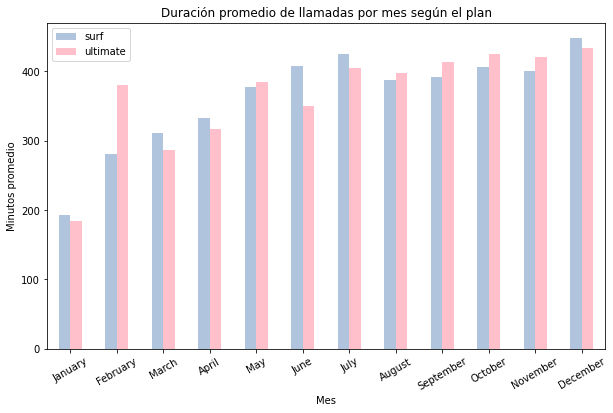

In [45]:
#Ahora procederemos con graficar los resultados:

pivot_users_minutes_spent_mean.plot(kind='bar', figsize=[10,6], color=['lightsteelblue','pink'], xlabel='Mes', rot=30,
                                    ylabel='Minutos promedio', title='Duración promedio de llamadas por mes según el plan')

plt.legend(['surf','ultimate'])

plt.show()

count    1573.000000
mean      405.250477
std       221.684445
min         0.000000
25%       256.000000
50%       402.000000
75%       544.000000
max      1432.000000
Name: minutes_spent, dtype: float64

count     720.000000
mean      406.708333
std       227.270019
min         0.000000
25%       247.000000
50%       399.000000
75%       532.500000
max      1293.000000
Name: minutes_spent, dtype: float64

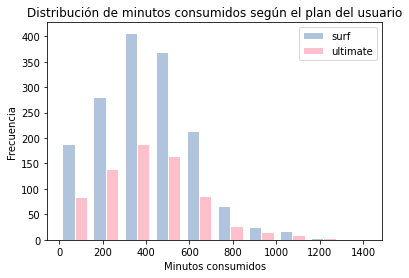

In [46]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


#Primero almacenaremos como Dataframe los minutos de los usuarios de surf:
df_users_surf_minutes = df_users[df_users['plan']=='surf']['minutes_spent']


display(df_users_surf_minutes.describe())

#Ahora almacenaremos un nuevo Dataframe con los minutos de los usuarios de ultimate:

df_users_ultimate_minutes = df_users[df_users['plan']=='ultimate']['minutes_spent']

display(df_users_ultimate_minutes.describe())

#Procedemos con las gráficas de distribución:

x=[df_users_surf_minutes, df_users_ultimate_minutes]

fig, ax = plt.subplots()
ax.hist(x, bins=10, color=['lightsteelblue', 'pink'], edgecolor = "white")

plt.title('Distribución de minutos consumidos según el plan del usuario')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Minutos consumidos')
plt.ylabel('Frecuencia')

plt.show()

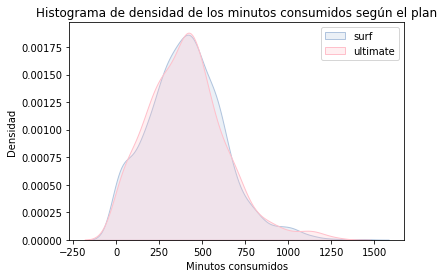

In [47]:
#Gráfico de densidad de la duración de llamadas

sns.kdeplot(x = df_users_surf_minutes, fill = True, color='lightsteelblue')
sns.kdeplot(x = df_users_ultimate_minutes, fill = True, shade=True, color= 'pink')

plt.title('Histograma de densidad de los minutos consumidos según el plan')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Minutos consumidos')
plt.ylabel('Densidad')


plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [48]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_surf_minutes = df_users_surf_minutes.mean()
print(f'La media de llamadas de los usuarios surf es: {mean_surf_minutes}')
print()

var_surf_minutes = np.var(df_users_surf_minutes)
print(f'La varianza de llamadas de los usuarios surf es: {var_surf_minutes}')
print()

mean_ultimate_minutes = df_users_ultimate_minutes.mean()
print(f'La media de llamadas de los usuarios ultimate es: {mean_ultimate_minutes}')
print()

var_ultimate_minutes = np.var(df_users_ultimate_minutes)
print(f'La varianza de llamadas de los usuarios surf es: {var_ultimate_minutes}')
print()


La media de llamadas de los usuarios surf es: 405.2504767959313

La varianza de llamadas de los usuarios surf es: 49112.75099309752

La media de llamadas de los usuarios ultimate es: 406.7083333333333

La varianza de llamadas de los usuarios surf es: 51579.923263888886



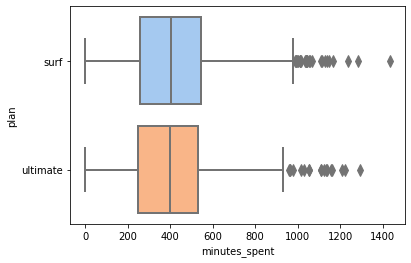

count    1573.000000
mean      405.250477
std       221.684445
min         0.000000
25%       256.000000
50%       402.000000
75%       544.000000
max      1432.000000
Name: minutes_spent, dtype: float64

count     720.000000
mean      406.708333
std       227.270019
min         0.000000
25%       247.000000
50%       399.000000
75%       532.500000
max      1293.000000
Name: minutes_spent, dtype: float64

In [49]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(x = "minutes_spent", y = "plan", data = df_users, palette= 'pastel',  saturation = 0.9, linewidth = 2,
           fliersize = 8, order=['surf', 'ultimate'])


plt.show()

display(df_users_surf_minutes.describe())
display(df_users_ultimate_minutes.describe())




In [50]:
#Si queremos calcular el número de registros de usuarios que superaron los minutos de su plan hacemos lo siguiente:

surf_users_spent_more_minutes_than_plan = df_users[(df_users['plan']=='surf') & (df_users['minutes_spent']>500)]['minutes_spent']

ultimate_users_spent_more_minutes_than_plan = df_users[(df_users['plan']=='ultimate') & (df_users['minutes_spent']>3000)]['minutes_spent']

display(surf_users_spent_more_minutes_than_plan.describe())
display(ultimate_users_spent_more_minutes_than_plan.describe())

count     484.000000
mean      659.173554
std       148.219840
min       501.000000
25%       555.000000
50%       608.000000
75%       704.000000
max      1432.000000
Name: minutes_spent, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: minutes_spent, dtype: float64

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

**Respuesta** El comportamiento de llamadas de los usuarios en minutos gastados es muy similar en los dos planes.

Como se puede observar en el gráfico de densidad, diagrama de cajas, como también, desplegando el describe  no hay mucha diferencia en los datos de media, mediana, desviación estandar y varianza.

Las diferencias más notorias son los límites del Cuartil 3 (544 en usuarios surf y 532.5 en usuarios ultimate) y los valores máximos, que tienen comportamiento de dato atípico (valor máximo 1432 en surf y valor máximo en ultimate 1293).

Por último, agregamos que ningún usuario ultimate superó el límite de minutos de su plan, mientras que 484 registros de usuarios de surf superaron el límite de minutos que ofrece el plan.

### Mensajes

In [51]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

#Al igual que lo hecho en los minutos usados en llamadas, crearemos una pivot table que almacene el promedio de
#mensajes enviados al mes por plan:
pivot_users_messages_sent_mean = df_users.pivot_table(index='dt_month', columns='plan', values='messages_sent', aggfunc='mean')

#Usaremos nuevamente el diccionario month_names para visualizar mejor la información:
pivot_users_messages_sent_mean = pivot_users_messages_sent_mean.rename(index=month_names)

display(pivot_users_messages_sent_mean)

plan,surf,ultimate
dt_month,,
January,10.500000,15.500000
February,12.000000,21.571429
March,15.260870,20.250000
April,17.400000,22.047619
May,24.012987,32.103448
June,25.298969,29.340426
July,27.033058,32.830508
August,28.777778,38.478873
September,30.762887,37.895349


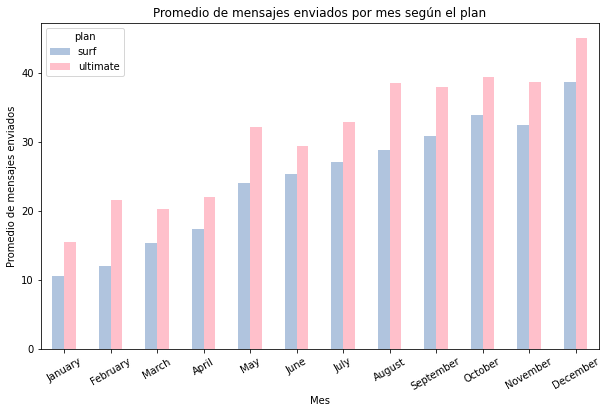

In [52]:
#Ahora procederemos a graficar los resultados:

pivot_users_messages_sent_mean.plot(kind='bar', color=['lightsteelblue', 'pink'], figsize=[10,6], rot=30,
                                    xlabel='Mes', ylabel='Promedio de mensajes enviados', 
                                    title='Promedio de mensajes enviados por mes según el plan')

plt.show()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages_sent, dtype: float64

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: messages_sent, dtype: float64

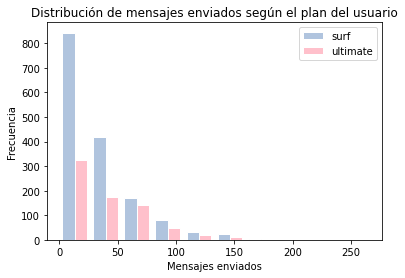

In [53]:
# Compara el número de mensajes que necesitan los usuarios de cada plan. Traza un histograma.


#Al igual que con las llamadas, almacenaremos los mensajes según el plan en 2 variables distintas:

#Un Dataframe para surf:

df_users_surf_messages = df_users[df_users['plan']=='surf']['messages_sent']


display(df_users_surf_messages.describe())

#Ahora almacenaremos un nuevo Dataframe con los mensajes de los usuarios de ultimate:

df_users_ultimate_messages = df_users[df_users['plan']=='ultimate']['messages_sent']

display(df_users_ultimate_messages.describe())

#Procedemos con las gráficas de distribución:

x=[df_users_surf_messages, df_users_ultimate_messages]

fig, ax = plt.subplots()
ax.hist(x, bins=10, color=['lightsteelblue', 'pink'], edgecolor = "white")

plt.title('Distribución de mensajes enviados según el plan del usuario')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Mensajes enviados')
plt.ylabel('Frecuencia')

plt.show()

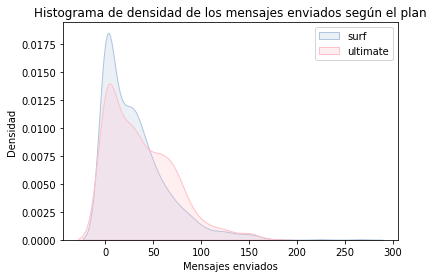

In [54]:
#Gráfico de densidad de los mensajes enviados

sns.kdeplot(x = df_users_surf_messages, fill = True, color='lightsteelblue')
sns.kdeplot(x = df_users_ultimate_messages, fill = True, shade=True, color= 'pink')

plt.title('Histograma de densidad de los mensajes enviados según el plan')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Mensajes enviados')
plt.ylabel('Densidad')


plt.show()

In [55]:
# Calculo de media y varianza de los mensajes enviados.


mean_surf_messages = df_users_surf_messages.mean()
print(f'La media de mensajes de los usuarios surf es: {mean_surf_messages}')
print()

var_surf_messages = np.var(df_users_surf_messages)
print(f'La varianza de mensajes de los usuarios surf es: {var_surf_messages}')
print()

mean_ultimate_messages = df_users_ultimate_messages.mean()
print(f'La media de mensajes de los usuarios ultimate es: {mean_ultimate_messages}')
print()

var_ultimate_messages = np.var(df_users_ultimate_messages)
print(f'La varianza de mensajes de los usuarios surf es: {var_ultimate_messages}')
print()

La media de mensajes de los usuarios surf es: 31.15956770502225

La varianza de mensajes de los usuarios surf es: 1126.0082317266622

La media de mensajes de los usuarios ultimate es: 37.55138888888889

La varianza de mensajes de los usuarios surf es: 1207.0779147376545



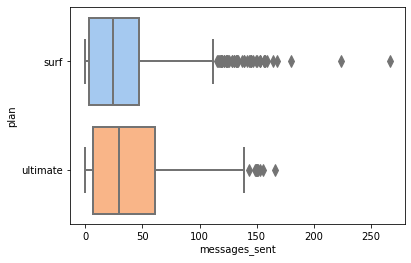

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages_sent, dtype: float64

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: messages_sent, dtype: float64

In [56]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente

sns.boxplot(x = "messages_sent", y = "plan", data = df_users, palette= 'pastel',  saturation = 0.9, linewidth = 2,
           fliersize = 8, order=['surf', 'ultimate'])


plt.show()

display(df_users_surf_messages.describe())
display(df_users_ultimate_messages.describe())

In [57]:
#Si hacemos el cálculo del IQR para los datos de mensajes de surf, observamos lo siguiente:

surf_msg_Q1 = 3
surf_msg_Q3 = 47
IQR_msg_surf = surf_msg_Q3 - surf_msg_Q1
Max_distance_IQR_msg_surf = surf_msg_Q3 + (1.5*IQR_msg_surf) 

print(f"El punto máximo de la distribución de mensajes de surf es: {Max_distance_IQR_msg_surf}")


El punto máximo de la distribución de mensajes de surf es: 113.0


In [58]:
#Revisión de datos atípicos en el plan surf que superan el límite superior del IQR:

messages_outliers_surf = df_users[(df_users['plan']=='surf') & (df_users['messages_sent']>Max_distance_IQR_msg_surf)]
messages_outliers_surf['messages_sent'].describe()

count     51.000000
mean     141.176471
std       26.623828
min      115.000000
25%      123.500000
50%      134.000000
75%      151.500000
max      266.000000
Name: messages_sent, dtype: float64

In [59]:
#Si queremos calcular el número de registros de usuarios que superaron los mensajes de su plan hacemos lo siguiente:

surf_users_spent_more_messages_than_plan = df_users[(df_users['plan']=='surf') & (df_users['messages_sent']>50)]['minutes_spent']

ultimate_users_spent_more_messages_than_plan = df_users[(df_users['plan']=='ultimate') & (df_users['messages_sent']>1000)]['minutes_spent']

display(surf_users_spent_more_messages_than_plan.describe())
display(ultimate_users_spent_more_messages_than_plan.describe())

count     340.000000
mean      474.576471
std       250.394020
min         0.000000
25%       298.750000
50%       451.000000
75%       608.000000
max      1432.000000
Name: minutes_spent, dtype: float64

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: minutes_spent, dtype: float64

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

**Respuesta** La gráfica que muestra un comportamiento más diciente de los datos de mensajes es la de cajas y bigotes. En este caso se puede observar que los usuarios de surf tienden a enviar menos de 50 mensajes; pero poblacionalmente muestra un comportamiento de los datos con sesgo a la derecha, mostrando así muchos datos que están fuera del Rango Intercuartílico superior; es decir, muchos datos atípicos. En este caso el IQR de surf es igual a 44 y los datos que están fuera del límite máximo de Q3 + 1.5IQR superan los 113 mensajes. Según el cálculo realizado y almacenado en messages_outliers_surf tenemos que hay 51 datos atípicos que superan los 113 mensajes y sesgan la gráfica de caja y bigotes a la derecha.

Finalmente, hubo 340 usuarios de surf que superaron el límite de su plan y ninguno de ultimate superó su límite.

### Internet

In [83]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan


#Crearemos una pivot table que almacene el promedio de mbs_usados al mes por plan:

pivot_users_internet_mean = df_users.pivot_table(index='dt_month', columns='plan', values='mb_used', aggfunc='mean')

pivot_users_internet_mean = pivot_users_internet_mean.rename(index= month_names)

display(pivot_users_internet_mean)



plan,surf,ultimate
dt_month,,
January,4874.860000,6918.092500
February,12178.843333,17128.808571
March,13345.440000,18321.518333
April,11984.203000,16121.654762
May,13936.354935,16624.482414
June,15301.529175,15337.921064
July,16783.600579,16344.744407
August,16795.331358,17814.720141
September,16591.431289,16969.869535


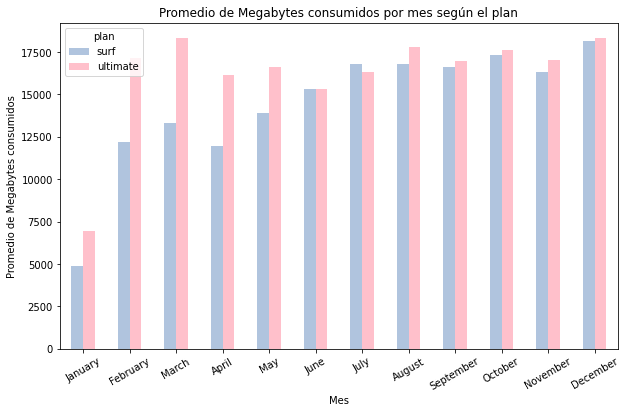

In [84]:
#Ahora procederemos a graficar los resultados:

pivot_users_internet_mean.plot(kind='bar', color=['lightsteelblue', 'pink'], figsize=[10,6], rot=30,
                                    xlabel='Mes', ylabel='Promedio de Megabytes consumidos', 
                                    title='Promedio de Megabytes consumidos por mes según el plan')

plt.show()

count     1573.000000
mean     16558.283490
std       8013.513327
min          0.000000
25%      11986.520000
50%      16829.310000
75%      20999.610000
max      70931.590000
Name: mb_used, dtype: float64

count      720.000000
mean     17214.699694
std       7851.897435
min          0.000000
25%      12666.955000
50%      16858.340000
75%      21014.527500
max      46595.330000
Name: mb_used, dtype: float64

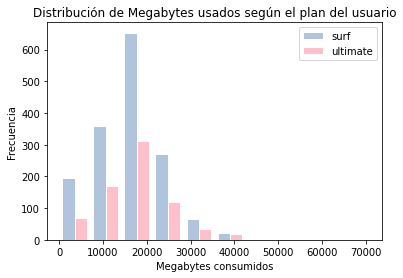

In [62]:
# Compara el número de mbs consumidos que necesitan los usuarios de cada plan. Traza un histograma.

df_users_internet_surf = df_users[df_users['plan']=='surf']['mb_used']

display(df_users_internet_surf.describe())

df_users_internet_ultimate = df_users[df_users['plan']=='ultimate']['mb_used']

display(df_users_internet_ultimate.describe())


x = [df_users_internet_surf, df_users_internet_ultimate]

fig, ax = plt.subplots()
ax.hist(x, bins=10, color=['lightsteelblue', 'pink'], edgecolor = "white")

plt.title('Distribución de Megabytes usados según el plan del usuario')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Megabytes consumidos')
plt.ylabel('Frecuencia')

plt.show()

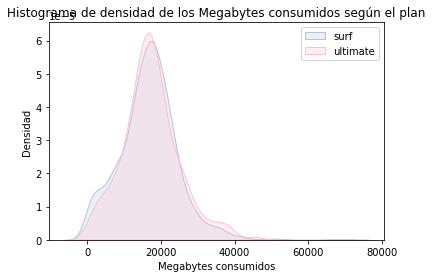

In [63]:
#Gráfico de densidad de los Megabytes consumidos

sns.kdeplot(x = df_users_internet_surf, fill = True, color='lightsteelblue')
sns.kdeplot(x = df_users_internet_ultimate, fill = True, shade=True, color= 'pink')

plt.title('Histograma de densidad de los Megabytes consumidos según el plan')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Megabytes consumidos')
plt.ylabel('Densidad')


plt.show()

In [64]:
# Calculo de media y varianza de los Megabytes consumidos.


mean_surf_internet = df_users_internet_surf.mean()
print(f'La media de megabytes consumidos por los usuarios surf es: {mean_surf_internet}')
print()

var_surf_internet = np.var(df_users_internet_surf)
print(f'La varianza de megabytes consumidos por los usuarios surf es: {var_surf_internet}')
print()

mean_ultimate_internet = df_users_internet_ultimate.mean()
print(f'La media de megabytes consumidos por los usuarios ultimate es: {mean_ultimate_internet}')
print()

var_ultimate_internet = np.var(df_users_internet_ultimate)
print(f'La varianza de megabytes consumidos por los usuarios surf es: {var_ultimate_internet}')
print()

La media de megabytes consumidos por los usuarios surf es: 16558.283490146216

La varianza de megabytes consumidos por los usuarios surf es: 64175571.68301331

La media de megabytes consumidos por los usuarios ultimate es: 17214.699694444444

La varianza de megabytes consumidos por los usuarios surf es: 61566665.1386863



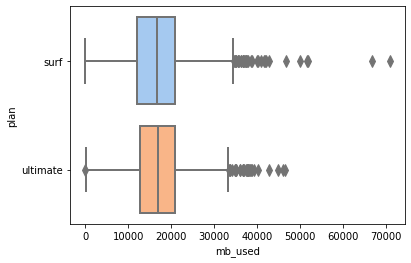

count     1573.000000
mean     16558.283490
std       8013.513327
min          0.000000
25%      11986.520000
50%      16829.310000
75%      20999.610000
max      70931.590000
Name: mb_used, dtype: float64

count      720.000000
mean     17214.699694
std       7851.897435
min          0.000000
25%      12666.955000
50%      16858.340000
75%      21014.527500
max      46595.330000
Name: mb_used, dtype: float64

In [65]:
# Traza un diagrama de caja para visualizar la distribución de los Megabytes consumidos mensualmente

sns.boxplot(x = "mb_used", y = "plan", data = df_users, palette= 'pastel',  saturation = 0.9, linewidth = 2,
           fliersize = 8, order=['surf', 'ultimate'])


plt.show()

display(df_users_internet_surf.describe())
display(df_users_internet_ultimate.describe())


In [66]:
#Si queremos calcular el número de usuarios que superaron los minutos de su plan hacemos lo siguiente:

surf_users_spent_more_mbs_than_plan = df_users[(df_users['plan']=='surf') & (df_users['mb_used']>15000)]['mb_used']

ultimate_users_spent_more_mbs_than_plan = df_users[(df_users['plan']=='ultimate') & (df_users['mb_used']>30000)]['mb_used']

display(surf_users_spent_more_mbs_than_plan.describe())
display(ultimate_users_spent_more_mbs_than_plan.describe())

count      950.000000
mean     21390.974084
std       5856.361419
min      15002.950000
25%      17448.325000
50%      19998.945000
75%      23536.672500
max      70931.590000
Name: mb_used, dtype: float64

count       46.000000
mean     35529.459348
std       4189.694352
min      30169.840000
25%      32287.575000
50%      35050.865000
75%      37870.752500
max      46595.330000
Name: mb_used, dtype: float64

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

**Respuesta** El consumo de Megabytes en los usuarios es muy similar entre los dos planes en cuanto a la distribución normal de la mayoría de usuarios. Sin embargo, **cabe anotar que como el límite de consumo del plan de surf es de 15GB**, poco más del 60% de registros de sus usuarios superaron el límite de su plan (950 registros), con una media de 21390 Mbs consumidas y una mediana de 19999 Mbs consumidas.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [67]:
pivot_total_cost = df_users.pivot_table(index = 'dt_month', columns='plan', values='total_cost_per_user', aggfunc='mean')

pivot_total_cost = pivot_total_cost.rename(index= month_names)

display(pivot_total_cost)

plan,surf,ultimate
dt_month,,
January,20.000000,70.000000
February,34.260000,70.000000
March,45.792609,74.666667
April,40.458600,73.000000
May,47.240130,70.724138
June,48.935155,71.638298
July,62.226529,71.898305
August,63.576728,72.859155
September,57.952320,72.034884


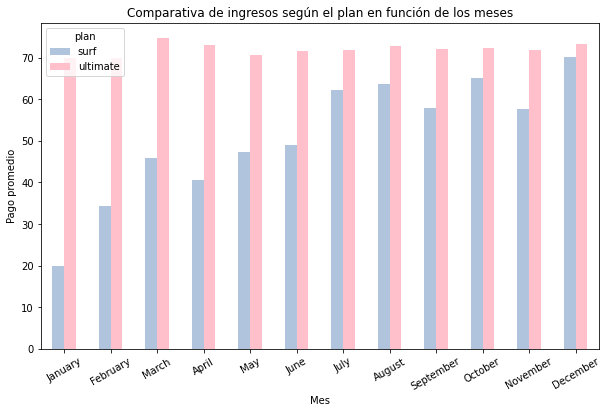

In [68]:
pivot_total_cost.plot(kind='bar', rot= 30, color=['lightsteelblue','pink'], xlabel='Mes', ylabel='Pago promedio',
                     figsize= [10,6], title='Comparativa de ingresos según el plan en función de los meses')

plt.show()

En promedio vemos que el comportamiento de los usuarios de surf varía respecto a los de ultimate. Mientras que los usuarios de ultimate, rara vez superan el pago de su plan, los de surf en cambio, lo superan todos los meses salvo enero.

Aquí hay una gran oportunidad para revisar si los usuarios de surf (según lo visto también en el comportamiento de consumo de internet) cambien su plan a ultimate.

In [69]:
#Podemos hacer la revisión de la conclusión anterior aquí:

print(f"Registros de usuarios de surf que superaron el límite de su plan de minutos: ", surf_users_spent_more_minutes_than_plan.count())

print()

print(f"Registros de usuarios de surf que superaron el límite de su plan de mensajes: ", surf_users_spent_more_messages_than_plan.count())

print()

print(f"Registros de usuarios de surf que superaron el límite de su plan de megas: ", surf_users_spent_more_mbs_than_plan.count())

                       

Registros de usuarios de surf que superaron el límite de su plan de minutos:  484

Registros de usuarios de surf que superaron el límite de su plan de mensajes:  340

Registros de usuarios de surf que superaron el límite de su plan de megas:  950


count    1573.000000
mean       60.331933
std        55.263890
min        20.000000
25%        20.000000
50%        40.150000
75%        80.000000
max       588.660000
Name: total_cost_per_user, dtype: float64

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_cost_per_user, dtype: float64

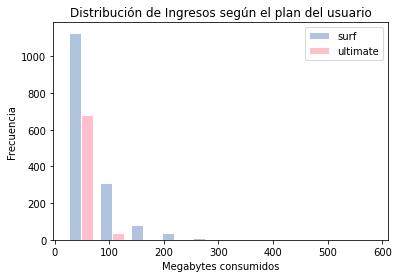

In [70]:
df_users_total_cost_surf = df_users[df_users['plan'] == 'surf']['total_cost_per_user']

display(df_users_total_cost_surf.describe())

df_users_total_cost_ultimate = df_users[df_users['plan'] == 'ultimate']['total_cost_per_user']

display(df_users_total_cost_ultimate.describe())

#Acá procedemos con el gráfico de distribución:

x = [df_users_total_cost_surf, df_users_total_cost_ultimate]

fig, ax = plt.subplots()
ax.hist(x, bins=10, color=['lightsteelblue', 'pink'], edgecolor = "white")

plt.title('Distribución de Ingresos según el plan del usuario')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Megabytes consumidos')
plt.ylabel('Frecuencia')

plt.show()

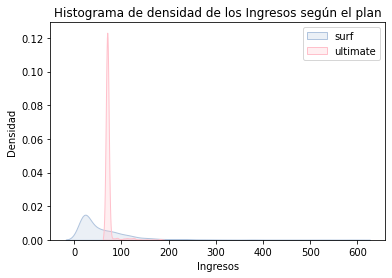

In [85]:
#El histograma anterior se puede ver mejor con a través de un gráfico de densidad.


sns.kdeplot(x = df_users_total_cost_surf, fill = True, color='lightsteelblue')
sns.kdeplot(x = df_users_total_cost_ultimate, fill = True, shade=True, color= 'pink')

plt.title('Histograma de densidad de los Ingresos según el plan')
plt.legend(['surf', 'ultimate'])
plt.xlabel('Ingresos')
plt.ylabel('Densidad')

plt.show()

In [72]:
# Calculo de media y varianza de los ingresos.


mean_surf_total_cost = df_users_total_cost_surf.mean()
print(f'La media de ingresos de los usuarios surf es: {mean_surf_total_cost}')
print()

var_surf_total_cost = np.var(df_users_total_cost_surf)
print(f'La varianza de ingresos de los usuarios surf es: {var_surf_total_cost}')
print()

mean_ultimate_total_cost = df_users_total_cost_ultimate.mean()
print(f'La media de ingresos de los usuarios ultimate es: {mean_ultimate_total_cost}')
print()

var_ultimate_total_cost = np.var(df_users_total_cost_ultimate)
print(f'La varianza de ingresos de los usuarios ultimate es: {var_ultimate_total_cost}')
print()

La media de ingresos de los usuarios surf es: 60.331932612841705

La varianza de ingresos de los usuarios surf es: 3052.155930912179

La media de ingresos de los usuarios ultimate es: 72.31388888888888

La varianza de ingresos de los usuarios ultimate es: 129.66814043209877



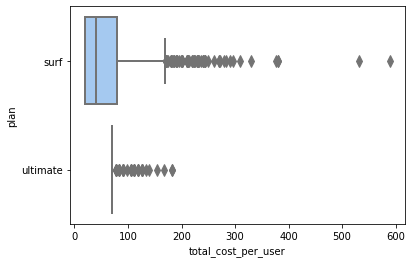

count    1573.000000
mean       60.331933
std        55.263890
min        20.000000
25%        20.000000
50%        40.150000
75%        80.000000
max       588.660000
Name: total_cost_per_user, dtype: float64

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_cost_per_user, dtype: float64

In [73]:
# Traza un diagrama de caja para visualizar la distribución de los mensajes enviados mensualmente

sns.boxplot(x = "total_cost_per_user", y = "plan", data = df_users, palette= 'pastel',  saturation = 0.9, linewidth = 2,
           fliersize = 8, order=['surf', 'ultimate'])


plt.show()

display(df_users_total_cost_surf.describe())
display(df_users_total_cost_ultimate.describe())

In [74]:
#Usuarios de ultimate que superaron el monto del plan:

ultimate_users_spent_more_money_than_plan = df_users[(df_users['plan']=='ultimate') & (df_users['total_cost_per_user']>70)]

print(f"Registros de usuarios que superaron el monto del plan ultimate: ", ultimate_users_spent_more_money_than_plan['user_id'].count())
print(f"Número de usuarios que superaron el monto del plan ultimate: ", ultimate_users_spent_more_money_than_plan['user_id'].nunique())

Registros de usuarios que superaron el monto del plan ultimate:  41
Número de usuarios que superaron el monto del plan ultimate:  18


In [75]:
#Usuarios de surf que superaron el monto del plan:

surf_users_spent_more_money_than_plan = df_users[(df_users['plan']=='surf') & (df_users['total_cost_per_user']>20)]


print(f"Registros de usuarios que superaron el monto del plan surf: ", surf_users_spent_more_money_than_plan['user_id'].count())
print(f"Número de usuarios que superaron el monto del plan surf: ", surf_users_spent_more_money_than_plan['user_id'].nunique())


Registros de usuarios que superaron el monto del plan surf:  1120
Número de usuarios que superaron el monto del plan surf:  293


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Efectivamente se evidencia que el comportamiento de los usuarios de ultimate rara vez varía y suelen no exceder los límites de su plan (que en este caso son 41 registros que corresponden a 18 usuarios distintos según el código anterior), mientras que más del 60% superan los límites de su plan (según lo mostrado en las anotaciones previas). Es por ello que el gráfico de caja y bigotes tiene estos registros como datos atípicos, ya que Q1, la Mediana y Q3 son iguales.

Por otro lado, los resultados de surf confirman que los usuarios suelen exceder los límites de su plan.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [76]:
# Prueba las hipótesis

#En este caso la hipótesis nula debería considerar que: "Los ingresos promedios de los usuarios Ultimate y Surf son iguales"

df_users_total_cost_surf # Este es nuestro Dataframe de ingresos de usuarios surf
df_users_total_cost_ultimate # Este es nuestro Dataframe de ingresos de usuarios ultimate

alpha = 0.05 # Nuestro alpha será de 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son muy diferentes, por ello
#usamos equal_var = False. El método a utilizar es st.ttest_ind:

results = st.ttest_ind(df_users_total_cost_surf, df_users_total_cost_ultimate, equal_var=False) 

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 3.6278039040985444e-16

Rechazamos la hipótesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [77]:
# Prueba las hipótesis

#En este caso la hipótesis nula debería considerar que: "Los ingresos promedios de los usuarios de NY-NJ son iguales al resto
#del país"


#Primero almacenamos los registros de los usuarios de NY-NJ y los que no en dos variables distintas:
ny_nj_users = df_users[df_users['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_cost_per_user']

non_ny_nj_users = df_users[df_users['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_cost_per_user']


display(ny_nj_users.describe())

display(non_ny_nj_users.describe())

print("La varianza de los ingresos de usuarios de NY-NJ es: ", np.var(ny_nj_users))
print()
print("La varianza de los ingresos de usuarios que no son de NY-NJ es: ", np.var(non_ny_nj_users))

count    377.000000
mean      59.611804
std       43.477850
min       20.000000
25%       20.000000
50%       51.080000
75%       71.680000
max      280.000000
Name: total_cost_per_user, dtype: float64

count    1916.000000
mean       64.976242
std        47.084648
min        20.000000
25%        23.870000
50%        70.000000
75%        70.000000
max       588.660000
Name: total_cost_per_user, dtype: float64

La varianza de los ingresos de usuarios de NY-NJ es:  1885.3093622638592

La varianza de los ingresos de usuarios que no son de NY-NJ es:  2215.8070290937544


In [78]:
#Ahora realizaremos la prueba estableciendo un alpha = 0.05
alpha = 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son muy diferentes, por ello
#usamos equal_var = False. El método a utilizar es st.ttest_ind:

results = st.ttest_ind(ny_nj_users, non_ny_nj_users, equal_var=False)

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.031237788444585222

Rechazamos la hipótesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

### Nota importante:

En cada celda de código está explicada la metodología explicativa de cada paso a realizar. En estas conclusiones solo se harán las observaciones correspondientes a oportunidades de negocio.

**Respuesta**

Como conclusiones más importantes podemos considerar las siguientes observaciones:

- Hay una gran oportunidad de brindarle a los usuarios de surf una mejora en su plan para evitar que excedan el límite del mismo. Una estrategia podría ser en brindarle a los 293 sus datos de pagos cada mes que fue excedido e invitarlo a que pase a ser usuario ultimate, lo mismo que para los 18 usuarios de ultimate; en especial aquellos que más repiten sus comportamiento a lo largo del año.




In [79]:
#Número de veces que cada usuario de surf superó el límite de su plan

surf_users_spent_more_money_than_plan['user_id'].value_counts()

1362    11
1171    11
1359    11
1498    10
1261    10
        ..
1350     1
1169     1
1345     1
1337     1
1369     1
Name: user_id, Length: 293, dtype: int64

In [80]:
#Número de veces que cada usuario de ultimate superó el límite de su plan

ultimate_users_spent_more_money_than_plan['user_id'].value_counts()

1028    9
1144    5
1490    4
1043    4
1460    3
1403    2
1038    2
1373    2
1196    1
1204    1
1006    1
1283    1
1185    1
1126    1
1246    1
1435    1
1301    1
1057    1
Name: user_id, dtype: int64

- Los ingresos promedio por usuario, claramente difieren según el plan. Mientras que los usuarios de ultimate rara vez exceden el límite de sus pagos, la mayoría de los usuarios de surf (más del 60%) los excede. Nuevamente, se evidencia una gran oportunidad de negocio con los 293 usuarios que exceden el límite de sus planes y pasen a ser usuarios de ultimate ya que su comportamiento de consumo es muy similar a los de los usuarios de ultimate.



- El mes de menos actividad tanto en llamadas, mensajes e internet suele ser enero, tanto para surf como para ultimate. Una estrategia que podría implementarse puede ser aplicar descuentos en las tarifas adicionales durante ese mes para que los usuarios aumenten su actividad y poder así generar más ingresos.